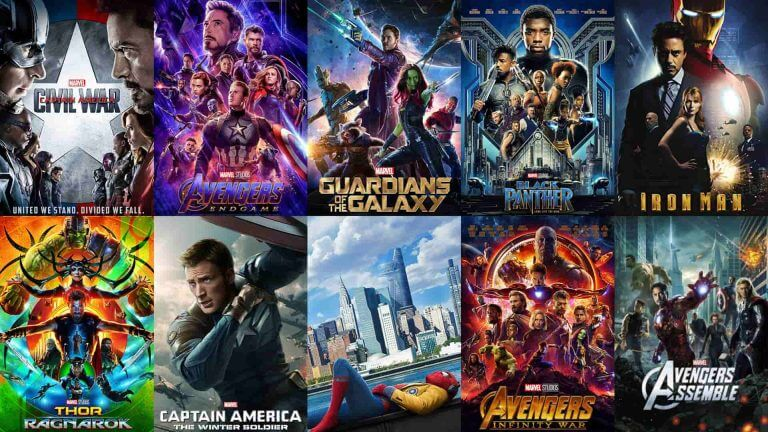

#**Best Streaming Service Analysis**

In this project, we will analyse the main streamming services like Netflix, Amazon Prime Video, Disney+, Hulu.

<br>

**Import the necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.offline as pyo
# Set notebook mode to work in offline
pyo.init_notebook_mode()
import plotly.express as px
# import cufflinks as cf
# cf.go_offline()
# import plotly.graph_objects as go
# fig = go.Figure()

# from wordcloud import WordCloud

%matplotlib inline

In [ ]:
df= pd.read_csv('/content/moviestreams.csv')
df.head()

Rotten Tomatoes is an American review-aggregation website for film and television.

In [ ]:
cols = df.columns.tolist()
cols

In [ ]:
df.drop(['Unnamed: 0','ID',], axis=1, inplace = True)
cols = df.columns.tolist()
cols

**Check For Missing Values**

In [ ]:
df.isna().sum()

As we can see, there are missing values in the some of the columns. We will not drop these columns for now.



<br>

## Let's remove the **'+'** sign attached to the values in the **Age** column.

In [ ]:
df['Age']

In [ ]:
age_map = {'18+' : 18, '7+' : 7, '13+': 13, 'all' : 0, '16+' : 16}
df['AgeCopy'] = df['Age'].map(age_map)
df['AgeCopy']

<br>

## Let's remove the **'%'** sign attached to the values in the **Rotten Tomatoes** column.

In [ ]:
df['New_Rotten_Tomatoes'] = df['Rotten Tomatoes'].str.replace("%","")
for i in df['New_Rotten_Tomatoes']:
  if i==str:
    i.astype(int)
df['New_Rotten_Tomatoes']

<br>
<br>

#**Visualisations**

#What Is The Number Of Movies For Each Age Group?

In [ ]:
# !pip install plotly==4.14.1

In [ ]:

# # JUPYTER NOTEBOOK
# !pip install "notebook>=5.3" "ipywidgets>=7.2"

# # JUPYTER LAB

# !pip install jupyterlab "ipywidgets>=7.5"

In [ ]:
df['Age'].value_counts()

<br>

<br>

**Top 10 languages in Streaming Services**

In [ ]:
#counting and assigning the 10 top values to a variable
languages = df.Language.value_counts().head(10)

plt.figure(figsize=(12,8))
plt.title('Top 10 languages in Streaming Services')
sns.barplot(x=languages.index, y=languages.values)

In [ ]:
from IPython.display import HTML
import plotly.express as px
fig = px.pie(df,
             values=languages.values,
             names=languages.index,
             title='Top 10 languages in Streaming Services',
             height=600)
HTML(fig.to_html())

<br>

<br>

**Number of Movies in specific age group in All services**

In [ ]:
from IPython.display import HTML
import plotly.express as px
fig = px.bar(df,
             x=df['Age'].value_counts().index,
             y=df['Age'].value_counts(),
             title="Number of Movies in specific age group in All services",
             text=df['Age'].value_counts(),
             height=600)
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside') #for the text to be outside.
HTML(fig.to_html())

**Number of Movies in specific age group in Netflix**

In [ ]:
from IPython.display import HTML
import plotly.express as px
netflix_df=df[df['Netflix']==1]
fig = px.bar(netflix_df,
             x=netflix_df['Age'].value_counts().index,
             y=netflix_df['Age'].value_counts(),
             title="Number of Movies in specific age group in Netflix",
             text=netflix_df['Age'].value_counts(),
             height=600)
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside') #for the text to be outside.
HTML(fig.to_html())

**Number of Movies in specific age group in Amazon Prime Video**

In [ ]:
from IPython.display import HTML
import plotly.express as px
prime_df=df[df['Prime Video']==1]
fig = px.bar(netflix_df,
             x=prime_df['Age'].value_counts().index,
             y=prime_df['Age'].value_counts(),
             title="Number of Movies in specific age group in Amazon Prime Video",
             text=prime_df['Age'].value_counts(),
             height=600)
fig.update_traces(marker_color='lightsalmon',texttemplate='%{text:.2s}', textposition='outside') #for the text to be outside.
HTML(fig.to_html())

**Number of Movies in specific age group in Disney+**

In [ ]:
from IPython.display import HTML
import plotly.express as px
Disney_df=df[df['Disney+']==1]
fig = px.bar(netflix_df,
             x=Disney_df['Age'].value_counts().index,
             y=Disney_df['Age'].value_counts(),
             title="Number of Movies in specific age group in Disney+ Video",
             text=Disney_df['Age'].value_counts(),
             height=600)
fig.update_traces(marker_color='red',texttemplate='%{text:.2s}', textposition='outside') #for the text to be outside.
HTML(fig.to_html())

**Number of Movies in specific age group in Hulu**

In [ ]:
from IPython.display import HTML
import plotly.express as px
Hulu_df=df[df['Hulu']==1]
fig = px.bar(netflix_df,
             x=Hulu_df['Age'].value_counts().index,
             y=Hulu_df['Age'].value_counts(),
             title="Number of Movies in specific age group in Hulu Video",
             text=Hulu_df['Age'].value_counts(),
             height=600)
fig.update_traces(marker_color='black',texttemplate='%{text:.2s}', textposition='outside') #for the text to be outside.
HTML(fig.to_html())

#**Rotten Tomatoes Score**

A Tomatometer score is calculated for a movie or TV show after it receives at least five reviews. When at least 60% of reviews for a movie or TV show are positive, a red tomato is displayed to indicate its Fresh status.

Rotten Tomatoes gives films a score out of 100 based on the averaged reviews of professional film critics. If a film gets a rating of 60 or more it gets a 'fresh' red tomato on the site. Less than 60 and it gets a rotten tomato.

In [ ]:
from IPython.display import HTML
import plotly.express as px

fig = px.bar(df,
             x=df['Rotten Tomatoes'].value_counts().index,
             y=df['Rotten Tomatoes'].value_counts(),
             title="Overall Rotten Tomato Ratings",
             text=df['Rotten Tomatoes'].value_counts(),
             height=600)
fig.update_traces(marker_color='blue',texttemplate='%{text:.2s}', textposition='outside') #for the text to be outside.
HTML(fig.to_html())

##**Rotten Tomato Ratings For Each Services**

In [ ]:
rt_scores = pd.DataFrame({'Streaming Service': ["Prime Video", "Hulu","Disney+","NetFlix"],
                                    'Rotten Tomato Score' : [netflix_df['Rotten Tomatoes'].value_counts()[0],
                                                             prime_df['Rotten Tomatoes'].value_counts()[0],
                                                             Disney_df['Rotten Tomatoes'].value_counts()[0],
                                                             Hulu_df['Rotten Tomatoes'].value_counts()[0]]})
rt_scores.head()

In [ ]:
# rt_scores.sort_values(ascending=False, by="Rotten Tomato Score").iplot(kind='bar', x='Streaming Service', y='Rotten Tomato Score',
#                            color='Violet', xTitle="Streaming Service",
#                            yTitle="Count of Movies with Score of 100%",
#                            title="Streaming Service with 100% Rotten Tomato Score")

In [ ]:
sorted_rt_score=rt_scores.sort_values(ascending=False, by="Rotten Tomato Score")
sorted_rt_score

In [ ]:
fig = px.bar(sorted_rt_score,
             x=sorted_rt_score['Streaming Service'],
             y=sorted_rt_score['Rotten Tomato Score'],
             title="Rotten Tomato Ratings For Each Services",
             text=sorted_rt_score['Rotten Tomato Score'],
             height=600)
fig.update_traces(marker_color='purple',texttemplate='%{text:.2s}', textposition='outside') #for the text to be outside.
HTML(fig.to_html())

We can see that Prime Video has 260 Rotten Tomato Score

#**IMDB Ratings**

In [ ]:
fig = px.bar(df,
             y=df['IMDb'].value_counts(),
             x=df['IMDb'].value_counts().index,
             title="Overall IMDb Ratings For All Services",
             text=df['IMDb'].value_counts(),
             height=600)
fig.update_traces(marker_color='purple',texttemplate='%{text:.2s}', textposition='outside') #for the text to be outside.
HTML(fig.to_html())

NB: You can also do the IMDb ratings for each streaming service.

####**Count Of Runtimes Of Movies**

In [ ]:
RuntimeCount = pd.DataFrame(dict(df['Runtime'].value_counts().sort_values(ascending=False)[:10]).items(),
             columns=['Runtime', 'Count'])

RuntimeCount

In [ ]:
fig = px.bar(df,
             x=RuntimeCount['Runtime'],
             y=RuntimeCount['Count'],
             title="Count Of Runtimes Of Movies",
             text=RuntimeCount['Runtime'],
             height=600)
fig.update_traces(marker_color='purple',texttemplate='%{text:.2s}', textposition='outside') #for the text to be outside.
HTML(fig.to_html())

Most of the movies have run time of around 90 minutes.

<br>

<br>

**Directors And Their Count Of Movies They Have Directed**

In [ ]:
df['Directors']=df['Directors'].astype(str) #run below code b4 this

In [ ]:
new_data = df[df['Directors'] !=np.nan]
# new_data=df['Directors']
directors_count = dict()
direc_in_data = list(new_data['Directors'])
for xdir in direc_in_data:
    curr_dirs = xdir.split(",")
    for xd in curr_dirs:
        if xd in directors_count.keys():
            directors_count[xd] = directors_count.get(xd) + 1
            # print(directors_count[xd])
            # print('========================')
        else:
            directors_count[xd] = 1
            # print(directors_count[xd])

In [ ]:
 DirCount = pd.DataFrame(directors_count.items(), columns=['Director', 'Count'])
 DirCount=DirCount.sort_values(ascending=False, by='Count').head(20)
 DirCount

In [ ]:
  DirCount=DirCount.drop(56, axis=0)

  DirCount

In [ ]:
fig = px.bar(DirCount,
             x=DirCount['Director'],
             y=DirCount['Count'],
             title="Directors And The Count Of Movies They Have Directed",
             text=DirCount['Count'],
             height=600)
fig.update_traces(marker_color='purple',texttemplate='%{text:.2s}', textposition='outside') #for the text to be outside.
HTML(fig.to_html())

We can see from above that Jay Chapman has directed most of the movies.

Below is the list of movies directed by Jay Chapman

In [ ]:
df[df['Directors']=='Jay Chapman'][['Directors','Title','Genres']]

###**Exploring Genres**

In [ ]:
genres_= dict(df['Genres'].value_counts())
count_genres = dict()
for g,count in genres_.items():
    g = g.split(",")
    for i in g:
        if i in count_genres.keys():
            count_genres[i] = count_genres.get(i)+1
        else:
            count_genres[i] = 1

In [ ]:
count_genres_df = pd.DataFrame(count_genres.items(), columns=['Genre', 'Count'])
count_genres_df

In [ ]:
fig = px.bar(count_genres_df,
             x=count_genres_df['Genre'],
             y=count_genres_df['Count'],
             title="Genre And their Counts",
             text=count_genres_df['Count'],
             height=600)
fig.update_traces(marker_color='lightsalmon',texttemplate='%{text:.2s}', textposition='outside') #for the text to be outside.
HTML(fig.to_html())

Most of the movies are **Drama** hence it has the highest count.

###**What Are The Top Movies On Each Platform?**

<br>

<br>

**On NetFlix**

In [ ]:
data_netflix_top = netflix_df[netflix_df['IMDb']>8.5]
data_netflix_top = data_netflix_top[['Title', 'IMDb']].sort_values(ascending=False, by='IMDb')
data_netflix_top

In [ ]:
fig = px.bar(data_netflix_top,
             x=data_netflix_top['Title'],
             y=data_netflix_top['IMDb'],
             title="Top Movies On Netflix",
             text=data_netflix_top['IMDb'],
             height=800)
fig.update_traces(marker_color='brown',texttemplate='%{text:.2s}', textposition='outside') #for the text to be outside.
HTML(fig.to_html())

<br>

<br>


**On Amazon Prime**

In [ ]:
amz_top = prime_df[prime_df['IMDb']>8.5]
amz_top = amz_top[['Title', 'IMDb']].sort_values(ascending=False, by='IMDb')
amz_top

In [ ]:
fig = px.bar(amz_top,
             x=amz_top['Title'],
             y=amz_top['IMDb'],
             title="Top Movies On Amazon Prime",
             text=amz_top['IMDb'],
             height=800)
fig.update_traces(marker_color='brown',texttemplate='%{text:.2s}', textposition='outside') #for the text to be outside.
HTML(fig.to_html())

<br>

<br>


**On Disney+**

In [ ]:
disney_top = Disney_df[Disney_df['IMDb']>8.5]
disney_top = disney_top[['Title', 'IMDb']].sort_values(ascending=False, by='IMDb')
disney_top

In [ ]:
fig = px.bar(disney_top,
             x=disney_top['Title'],
             y=disney_top['IMDb'],
             title="Top Movies On Disney+",
             text=disney_top['IMDb'],
             height=800)
fig.update_traces(marker_color='lightblue',texttemplate='%{text:.2s}', textposition='outside') #for the text to be outside.
HTML(fig.to_html())

<br>

<br>


**On Hulu**

In [ ]:
hulu_top = Hulu_df[Hulu_df['IMDb']>8.5]
hulu_top = hulu_top[['Title', 'IMDb']].sort_values(ascending=False, by='IMDb')
hulu_top

In [ ]:
fig = px.bar(hulu_top,
             x=hulu_top['Title'],
             y=hulu_top['IMDb'],
             title="Top Movies On Hulu",
             text=hulu_top['IMDb'],
             height=800)
fig.update_traces(marker_color='purple',texttemplate='%{text:.2s}', textposition='outside') #for the text to be outside.
HTML(fig.to_html())

In [ ]:


!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic
!jupyter nbconvert --to html /content/Best_Streaming_Service_Analysis.ipynb